# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Combining all fifteen csv files

In [2]:
#extracting all fifteen csv files from the same directory
file_path = r'G:\DataScience\Data Insight\NAICS\csv_files'
all_csv_files = glob.glob(file_path + '/*.csv')

csv_list = []

for csv_file in all_csv_files:
    combined_dataframe = pd.read_csv(csv_file, index_col = None, header = 0)
    csv_list.append(combined_dataframe)
    
#concatenating all fifteen csv files into one dataframe
data = pd.concat(csv_list, axis = 0, ignore_index = True)
data

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250
...,...,...,...,...
119179,1999,12,9111,2250
119180,1999,12,9120,28500
119181,1999,12,9130,30250
119182,1999,12,9141,500


In [3]:
#accessing to see if the dataframe contains null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119184 entries, 0 to 119183
Data columns (total 4 columns):
SYEAR           119184 non-null int64
SMTH            119184 non-null int64
NAICS           119184 non-null object
_EMPLOYMENT_    119184 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.6+ MB


In [4]:
#finding out the distinct number of years
data.SYEAR.value_counts()

2000    5208
2001    5208
2002    5208
2003    5208
2004    5208
2005    5208
2008    5196
2006    5196
2010    5196
2009    5196
2007    5196
1998    5184
1999    5184
1997    5184
2011    5172
2012    5172
2013    5172
2014    5172
2015    5172
2018    5136
2016    5136
2017    5136
2019    5136
Name: SYEAR, dtype: int64

In [5]:
#calulation to find out the total distinct number of years
2019 - 1997 + 1

23

In [6]:
#calculation to find out the total number of rows for each industry provided there twelve months for each year
23 * 12

276

## Getting *Farms* from Crop production[111] & Animal production and aquaculture[112]

In [7]:
#extracting each industry using the distinct NAICS numbers
Crop_Production = data.loc[data['NAICS'].str.contains('111', na = False)]
Animal_production_and_aquaculture = data.loc[data['NAICS'].str.contains('112', na = False)]

In [8]:
#concatenating the two sub-industries after extracting them using their distinct NAICS numbers
Farms = pd.concat([Crop_Production, Animal_production_and_aquaculture])
Farms

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5491,2000,1,Crop production[111],11250
5593,2000,2,Crop production[111],10250
5695,2000,3,Crop production[111],13500
5797,2000,4,Crop production[111],17000
5899,2000,5,Crop production[111],21000
...,...,...,...,...
33103,1999,8,Animal production and aquaculture[112],11500
33206,1999,9,Animal production and aquaculture[112],11500
33309,1999,10,Animal production and aquaculture[112],11500
33412,1999,11,Animal production and aquaculture[112],14000


### Changing all names of the NACIS column to *Farms*

After changing all column names to *Farms*, the dataframe was sorted by the **SYEAR and SMTH** columns. Then, the *Employment* column was segregated to add up consecutives even rows to get the sum of empoyments from both [111] and [112].

After that, the dataframe was merged back and the columns names were changed to reflect *Data Output Template*.

In [9]:
#Extracting CropProduction and Animal production and aquaculture using their unique NAICS numbers
Farms = Farms.replace('Crop production[111]', 'Farms')
Farms = Farms.replace('Animal production and aquaculture[112]', 'Farms')
Farms

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5491,2000,1,Farms,11250
5593,2000,2,Farms,10250
5695,2000,3,Farms,13500
5797,2000,4,Farms,17000
5899,2000,5,Farms,21000
...,...,...,...,...
33103,1999,8,Farms,11500
33206,1999,9,Farms,11500
33309,1999,10,Farms,11500
33412,1999,11,Farms,14000


In [10]:
#sorting the SYEAR column followed by the SMTH column
df1 = Farms.sort_values(['SYEAR', 'SMTH'])
df1.head(50)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
29923,1997,1,Farms,8750
29910,1997,1,Farms,13500
30026,1997,2,Farms,9750
30013,1997,2,Farms,14000
30129,1997,3,Farms,10500
30116,1997,3,Farms,13250
30232,1997,4,Farms,10500
30219,1997,4,Farms,15000
30335,1997,5,Farms,12000
30322,1997,5,Farms,15500


### Executing all aforementioned steps in one cell 

In [11]:
df = df1.drop(['SYEAR', 'SMTH', 'NAICS'], axis = 1)
df

df.index = np.arange(1,len(df)+1)
df = df.reset_index()
df

df = df.set_index('index')
df_odd = df.loc[df.index.values % 2 == 1]
df_even = df.loc[df.index.values % 2 == 0]
df_even = df_even.set_index(df_even.index.values - 1)
new = df_odd.add(df_even, fill_value = 0)
new = new.reset_index().reset_index()
new

df2 = df1[np.arange(len(df)) % 2 == 0]
df2 = df2.reset_index().reset_index()
df2

df3 = pd.merge(df2, new, how = 'inner', on = 'level_0')
df3 = df3.drop(['level_0', 'index_x', '_EMPLOYMENT__x', 'index_y'], axis = 1)
df3.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Farms = df3

Farms = Farms[(Farms.SYEAR != 2019)]

Farms

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Farms,22250
1,1997,2,Farms,23750
2,1997,3,Farms,23750
3,1997,4,Farms,25500
4,1997,5,Farms,27500
...,...,...,...,...
259,2018,8,Farms,19750
260,2018,9,Farms,24500
261,2018,10,Farms,21750
262,2018,11,Farms,22000


## Getting  *Transportation equipment manufacturing (excluding shipbuilding)*  from Motor vehicle manufacturing[3361], Motor vehicle body and trailer manufacturing[3362],  Motor vehicle parts manufacturing[3363],  Aerospace product and parts manufacturing[3364], Railroad rolling stock manufacturing[3365] & Other transportation equipment manufacturing[3369]	

The new method was applied to obatin the **Transportation equipment manufacturing (excluding shipbuilding)**. **The six extracted dataframes' __EMPLOYMENT__ were added to get the accurate results without merge methods.**

In [12]:
'''EXtracting Motor vehicle and manufacturing using its unique NAICS number 3361. This time arounf the NAICS column does not 
contain only the NAICS number 3361, as such you have rename the column unique values with the industry name as done below'''
Motor_vehicle_manufacturing = data.loc[data['NAICS'] == 3361].reset_index()
Motor_vehicle_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33725,2000,1,3361,1000
1,34037,2000,2,3361,750
2,34349,2000,3,3361,1250
3,34661,2000,4,3361,500
4,34973,2000,5,3361,2000
...,...,...,...,...,...
271,117751,1999,8,3361,4250
272,118060,1999,9,3361,3500
273,118369,1999,10,3361,3250
274,118678,1999,11,3361,3500


In [13]:
#Same procedure has been done for Mootor vehicle body and trailer manufacturing
Motor_vehicle_body_and_trailer_manufacturing = data.loc[data['NAICS'] == 3362].reset_index()
Motor_vehicle_body_and_trailer_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33726,2000,1,3362,2250
1,34038,2000,2,3362,2250
2,34350,2000,3,3362,1750
3,34662,2000,4,3362,1500
4,34974,2000,5,3362,2500
...,...,...,...,...,...
271,117752,1999,8,3362,2000
272,118061,1999,9,3362,1750
273,118370,1999,10,3362,1250
274,118679,1999,11,3362,1250


In [14]:
#Same procedure has been done for Motor vehicle parts and manufacturing
Motor_vehicle_parts_manufacturing = data.loc[data['NAICS'] == 3363].reset_index()
Motor_vehicle_parts_manufacturing 

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33727,2000,1,3363,1250
1,34039,2000,2,3363,750
2,34351,2000,3,3363,1750
3,34663,2000,4,3363,1500
4,34975,2000,5,3363,1500
...,...,...,...,...,...
271,117753,1999,8,3363,2250
272,118062,1999,9,3363,2500
273,118371,1999,10,3363,2250
274,118680,1999,11,3363,1000


In [15]:
#Same procedure has been applied to Aerospace product and parts manufacturing
Aerospace_product_and_parts_manufacturing = data.loc[data['NAICS'] == 3364].reset_index()
Aerospace_product_and_parts_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33728,2000,1,3364,2250
1,34040,2000,2,3364,1500
2,34352,2000,3,3364,2500
3,34664,2000,4,3364,3750
4,34976,2000,5,3364,2000
...,...,...,...,...,...
271,117754,1999,8,3364,2250
272,118063,1999,9,3364,2250
273,118372,1999,10,3364,2000
274,118681,1999,11,3364,2250


In [16]:
#Same procedure has been applied to Railrod rolling and  stock manufacturing
Railroad_rolling_stock_manufacturing = data.loc[data['NAICS'] == 3365].reset_index()
Railroad_rolling_stock_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33729,2000,1,3365,0
1,34041,2000,2,3365,500
2,34353,2000,3,3365,250
3,34665,2000,4,3365,1000
4,34977,2000,5,3365,1000
...,...,...,...,...,...
271,117755,1999,8,3365,0
272,118064,1999,9,3365,0
273,118373,1999,10,3365,0
274,118682,1999,11,3365,0


In [17]:
#Same procedure has been applied to Other transportation equipment manufacturing
Other_transportation_equipment_manufacturing = data.loc[data['NAICS'] == 3369].reset_index()
Other_transportation_equipment_manufacturing

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,33731,2000,1,3369,0
1,34043,2000,2,3369,500
2,34355,2000,3,3369,250
3,34667,2000,4,3369,500
4,34979,2000,5,3369,250
...,...,...,...,...,...
271,117757,1999,8,3369,500
272,118066,1999,9,3369,500
273,118375,1999,10,3369,250
274,118684,1999,11,3369,0


The rest of the aforementioned procedures continue below

In [18]:
Other_transportation_equipment_manufacturing['EMPLOYMENT'] = Other_transportation_equipment_manufacturing['_EMPLOYMENT_'] + Railroad_rolling_stock_manufacturing['_EMPLOYMENT_'] + Aerospace_product_and_parts_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_parts_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_body_and_trailer_manufacturing['_EMPLOYMENT_'] + Motor_vehicle_manufacturing['_EMPLOYMENT_']
Transportation_equipment_manufacturing_excluding_shipbuilding = Other_transportation_equipment_manufacturing

In [19]:
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.replace(3369, 
                                                    'Transportation equipment manufacturing - excluding shipbuilding')
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.drop(
    '_EMPLOYMENT_', axis= 1)
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding.drop(
'index', 1)
Transportation_equipment_manufacturing_excluding_shipbuilding

,SYEAR,SMTH,NAICS,EMPLOYMENT
0,2000,1,Transportation equipment manufacturing - exclu...,6750
1,2000,2,Transportation equipment manufacturing - exclu...,6250
2,2000,3,Transportation equipment manufacturing - exclu...,7750
3,2000,4,Transportation equipment manufacturing - exclu...,8750
4,2000,5,Transportation equipment manufacturing - exclu...,9250
...,...,...,...,...
271,1999,8,Transportation equipment manufacturing - exclu...,11250
272,1999,9,Transportation equipment manufacturing - exclu...,10500
273,1999,10,Transportation equipment manufacturing - exclu...,9000
274,1999,11,Transportation equipment manufacturing - exclu...,8000


In [20]:
Transportation_equipment_manufacturing_excluding_shipbuilding = Transportation_equipment_manufacturing_excluding_shipbuilding[
    (Transportation_equipment_manufacturing_excluding_shipbuilding.SYEAR != 2019)]
Transportation_equipment_manufacturing_excluding_shipbuilding.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Transportation_equipment_manufacturing_excluding_shipbuilding

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Transportation equipment manufacturing - exclu...,6750
1,2000,2,Transportation equipment manufacturing - exclu...,6250
2,2000,3,Transportation equipment manufacturing - exclu...,7750
3,2000,4,Transportation equipment manufacturing - exclu...,8750
4,2000,5,Transportation equipment manufacturing - exclu...,9250
...,...,...,...,...
271,1999,8,Transportation equipment manufacturing - exclu...,11250
272,1999,9,Transportation equipment manufacturing - exclu...,10500
273,1999,10,Transportation equipment manufacturing - exclu...,9000
274,1999,11,Transportation equipment manufacturing - exclu...,8000


#The visualization below gives you an idea of the distribution of this particular dataframe

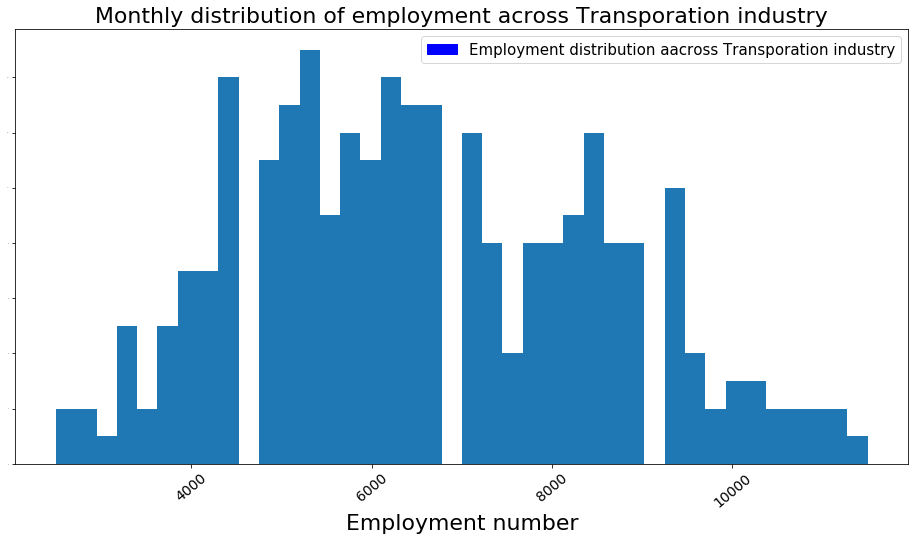

In [21]:
plt.figure(figsize=(16,8))
plt.hist(Transportation_equipment_manufacturing_excluding_shipbuilding['Employment'], bins =40)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across Transporation industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross Transporation industry')
plt.legend(handles=[blue], prop = {'size':15})

## Getting  *Broadcasting, data processing, and information*  from 	Broadcasting (except Internet)[515], Data processing, hosting, and related services[518] & International and other Other information services[519]

A new method was applied to obatin the *Broadcasting, data processing, and information*. The three extracted dataframes were merged on their indexes. Then, all the *Employment* columns were added to get the sum of empoyments from [515], [518] and [519]. 

After that, the other columns were removed, the NAICS column name was cahnged to *Broadcasting, data processing, and information* and the columns names were changed to reflect *Data Output Template*.

In [22]:
Broadcasting_exceptInternet = data.loc[data['NAICS'].str.contains('515', na = False)].reset_index()
Broadcasting_exceptInternet

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5480,2000,1,Broadcasting (except Internet)[515],4750
1,5582,2000,2,Broadcasting (except Internet)[515],5500
2,5684,2000,3,Broadcasting (except Internet)[515],5250
3,5786,2000,4,Broadcasting (except Internet)[515],6250
4,5888,2000,5,Broadcasting (except Internet)[515],4250
...,...,...,...,...,...
271,33105,1999,8,Broadcasting (except Internet)[515],4000
272,33208,1999,9,Broadcasting (except Internet)[515],3250
273,33311,1999,10,Broadcasting (except Internet)[515],4000
274,33414,1999,11,Broadcasting (except Internet)[515],4750


In [23]:
Data_processing_hosting = data.loc[data['NAICS'].str.contains('518', na = False)].reset_index()
Data_processing_hosting

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5492,2000,1,"Data processing, hosting, and related services...",750
1,5594,2000,2,"Data processing, hosting, and related services...",750
2,5696,2000,3,"Data processing, hosting, and related services...",750
3,5798,2000,4,"Data processing, hosting, and related services...",250
4,5900,2000,5,"Data processing, hosting, and related services...",250
...,...,...,...,...,...
271,33117,1999,8,"Data processing, hosting, and related services...",3250
272,33220,1999,9,"Data processing, hosting, and related services...",2250
273,33323,1999,10,"Data processing, hosting, and related services...",2250
274,33426,1999,11,"Data processing, hosting, and related services...",1500


In [24]:
Data_processing_hosting.NAICS.value_counts()

Data processing, hosting, and related services[518]    276
Name: NAICS, dtype: int64

In [25]:
other_information_services = data.loc[data['NAICS'].str.contains('519', na = False)].reset_index()
other_information_services

,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5534,2000,1,Other information services[519],2250
1,5636,2000,2,Other information services[519],2500
2,5738,2000,3,Other information services[519],3000
3,5840,2000,4,Other information services[519],2000
4,5942,2000,5,Other information services[519],2500
...,...,...,...,...,...
271,33160,1999,8,Other information services[519],3250
272,33263,1999,9,Other information services[519],3250
273,33366,1999,10,Other information services[519],3000
274,33469,1999,11,Other information services[519],4500


In [26]:
Broadcasting_data_processing_and_information = pd.merge(
    Broadcasting_exceptInternet, Data_processing_hosting, left_index=True, right_index=True)
Broadcasting_data_processing_and_information = pd.merge(
    Broadcasting_data_processing_and_information, other_information_services, left_index=True, right_index=True)
Broadcasting_data_processing_and_information

,index_x,SYEAR_x,SMTH_x,NAICS_x,_EMPLOYMENT__x,index_y,SYEAR_y,SMTH_y,NAICS_y,_EMPLOYMENT__y,index,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,5480,2000,1,Broadcasting (except Internet)[515],4750,5492,2000,1,"Data processing, hosting, and related services...",750,5534,2000,1,Other information services[519],2250
1,5582,2000,2,Broadcasting (except Internet)[515],5500,5594,2000,2,"Data processing, hosting, and related services...",750,5636,2000,2,Other information services[519],2500
2,5684,2000,3,Broadcasting (except Internet)[515],5250,5696,2000,3,"Data processing, hosting, and related services...",750,5738,2000,3,Other information services[519],3000
3,5786,2000,4,Broadcasting (except Internet)[515],6250,5798,2000,4,"Data processing, hosting, and related services...",250,5840,2000,4,Other information services[519],2000
4,5888,2000,5,Broadcasting (except Internet)[515],4250,5900,2000,5,"Data processing, hosting, and related services...",250,5942,2000,5,Other information services[519],2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,33105,1999,8,Broadcasting (except Internet)[515],4000,33117,1999,8,"Data processing, hosting, and related services...",3250,33160,1999,8,Other information services[519],3250
272,33208,1999,9,Broadcasting (except Internet)[515],3250,33220,1999,9,"Data processing, hosting, and related services...",2250,33263,1999,9,Other information services[519],3250
273,33311,1999,10,Broadcasting (except Internet)[515],4000,33323,1999,10,"Data processing, hosting, and related services...",2250,33366,1999,10,Other information services[519],3000
274,33414,1999,11,Broadcasting (except Internet)[515],4750,33426,1999,11,"Data processing, hosting, and related services...",1500,33469,1999,11,Other information services[519],4500


In [27]:
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.drop([
    'index_x', 'SYEAR_x', 'SMTH_x', 'NAICS_x', 'index_y', 'SYEAR_y', 'SMTH_y', 'NAICS_y', 'index'], axis =1)
Broadcasting_data_processing_and_information

,_EMPLOYMENT__x,_EMPLOYMENT__y,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,4750,750,2000,1,Other information services[519],2250
1,5500,750,2000,2,Other information services[519],2500
2,5250,750,2000,3,Other information services[519],3000
3,6250,250,2000,4,Other information services[519],2000
4,4250,250,2000,5,Other information services[519],2500
...,...,...,...,...,...,...
271,4000,3250,1999,8,Other information services[519],3250
272,3250,2250,1999,9,Other information services[519],3250
273,4000,2250,1999,10,Other information services[519],3000
274,4750,1500,1999,11,Other information services[519],4500


In [28]:
Broadcasting_data_processing_and_information['EMPLOYMENT'] =(Broadcasting_data_processing_and_information['_EMPLOYMENT__x'] + 
Broadcasting_data_processing_and_information['_EMPLOYMENT__y'] + Broadcasting_data_processing_and_information['_EMPLOYMENT_'])
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.drop(
    ['_EMPLOYMENT__x', '_EMPLOYMENT__y', '_EMPLOYMENT_'], axis = 1)
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information.replace(
    'Other information services[519]', 'Broadcasting data processing and information')
Broadcasting_data_processing_and_information.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']

In [29]:
Broadcasting_data_processing_and_information = Broadcasting_data_processing_and_information[
    (Broadcasting_data_processing_and_information.SYEAR != 2019)]

Broadcasting_data_processing_and_information

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Broadcasting data processing and information,7750
1,2000,2,Broadcasting data processing and information,8750
2,2000,3,Broadcasting data processing and information,9000
3,2000,4,Broadcasting data processing and information,8500
4,2000,5,Broadcasting data processing and information,7000
...,...,...,...,...
271,1999,8,Broadcasting data processing and information,10500
272,1999,9,Broadcasting data processing and information,8750
273,1999,10,Broadcasting data processing and information,9250
274,1999,11,Broadcasting data processing and information,10750


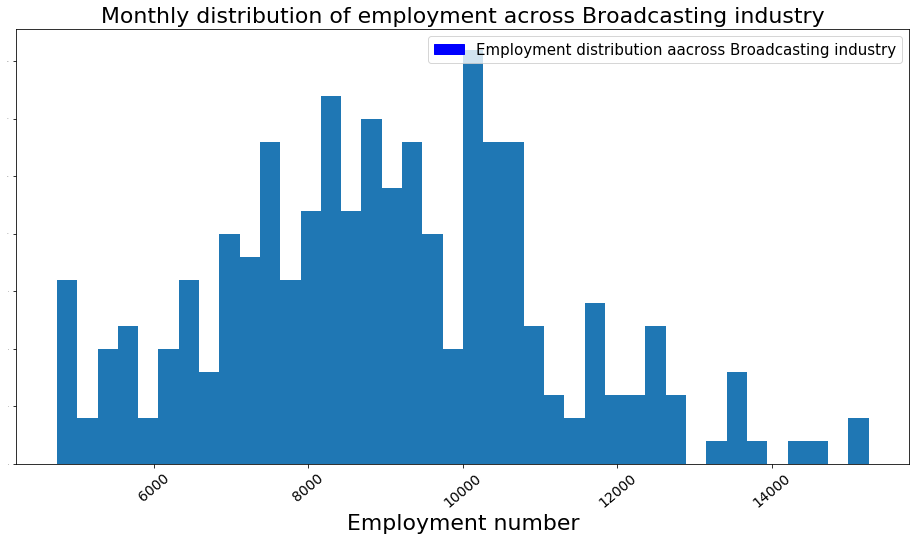

In [30]:
plt.figure(figsize=(16,8))
plt.hist(Broadcasting_data_processing_and_information['Employment'], bins =40)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across Broadcasting industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross Broadcasting industry')
plt.legend(handles=[blue], prop = {'size':15})

## Extracting Sinlgle NAIC numbers industry

In [31]:
Mining_and_quarrying  = data.loc[data['NAICS'].str.contains('212', na = False)]
Mining_and_quarrying = Mining_and_quarrying[(Mining_and_quarrying.SYEAR != 2019)]
Mining_and_quarrying.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Mining_and_quarrying

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5522,2000,1,Mining and quarrying (except oil and gas)[212],8250
5624,2000,2,Mining and quarrying (except oil and gas)[212],8250
5726,2000,3,Mining and quarrying (except oil and gas)[212],6750
5828,2000,4,Mining and quarrying (except oil and gas)[212],8250
5930,2000,5,Mining and quarrying (except oil and gas)[212],7500
...,...,...,...,...
33147,1999,8,Mining and quarrying (except oil and gas)[212],5250
33250,1999,9,Mining and quarrying (except oil and gas)[212],6750
33353,1999,10,Mining and quarrying (except oil and gas)[212],7750
33456,1999,11,Mining and quarrying (except oil and gas)[212],7500


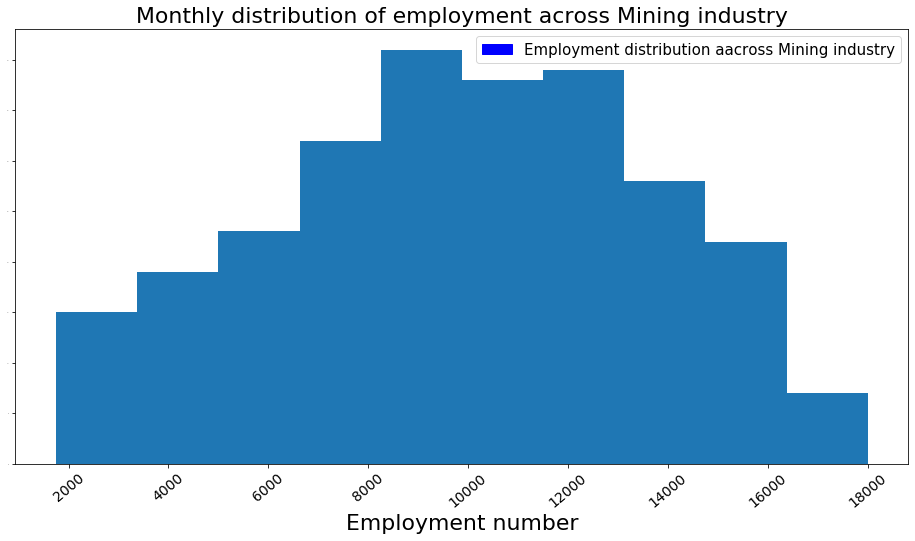

In [32]:
plt.figure(figsize=(16,8))
plt.hist(Mining_and_quarrying['Employment'], bins =10)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across Mining industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross Mining industry')
plt.legend(handles=[blue], prop = {'size':15})

In [33]:
Publishing_industries = data.loc[data['NAICS'].str.contains('511', na = False)]
Publishing_industries = Publishing_industries[(Publishing_industries.SYEAR != 2019)]
Publishing_industries.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Publishing_industries

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5549,2000,1,Publishing industries[511],9000
5651,2000,2,Publishing industries[511],10250
5753,2000,3,Publishing industries[511],10250
5855,2000,4,Publishing industries[511],11500
5957,2000,5,Publishing industries[511],12750
...,...,...,...,...
33175,1999,8,Publishing industries[511],12000
33278,1999,9,Publishing industries[511],9750
33381,1999,10,Publishing industries[511],10500
33484,1999,11,Publishing industries[511],11500


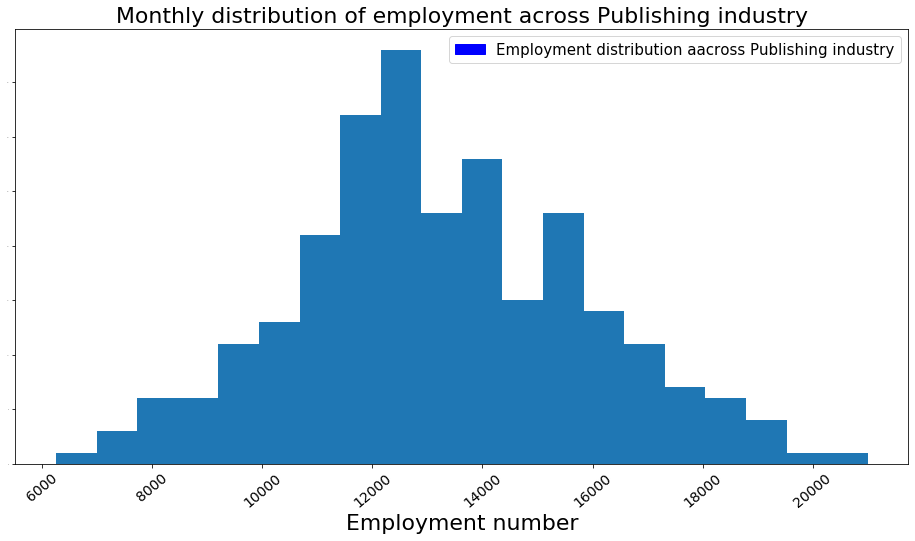

In [34]:
plt.figure(figsize=(16,8))
plt.hist(Publishing_industries['Employment'], bins =20)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across Publishing industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross Publishing industry')
plt.legend(handles=[blue], prop = {'size':15})

In [35]:
Wholesale_trade = data.loc[data['NAICS'].str.contains('41', na = False)]
Wholesale_trade = Wholesale_trade[:276]
Wholesale_trade = Wholesale_trade[(Wholesale_trade.SYEAR != 2019)]
Wholesale_trade.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Wholesale_trade

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
19,2000,1,Wholesale trade [41],69500
39,2000,2,Wholesale trade [41],70750
59,2000,3,Wholesale trade [41],70500
79,2000,4,Wholesale trade [41],66750
99,2000,5,Wholesale trade [41],65000
...,...,...,...,...
5391,1999,8,Wholesale trade [41],81250
5411,1999,9,Wholesale trade [41],86500
5431,1999,10,Wholesale trade [41],84500
5451,1999,11,Wholesale trade [41],82750


In [36]:
Hospitals = data.loc[data['NAICS'].str.contains('622', na = False)]
Hospitals = Hospitals[(Hospitals.SYEAR != 2019)]
Hospitals.columns = ['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'Employment']
Hospitals

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
5513,2000,1,Hospitals[622],67250
5615,2000,2,Hospitals[622],70250
5717,2000,3,Hospitals[622],68750
5819,2000,4,Hospitals[622],66500
5921,2000,5,Hospitals[622],68500
...,...,...,...,...
33138,1999,8,Hospitals[622],67000
33241,1999,9,Hospitals[622],66000
33344,1999,10,Hospitals[622],66750
33447,1999,11,Hospitals[622],67750


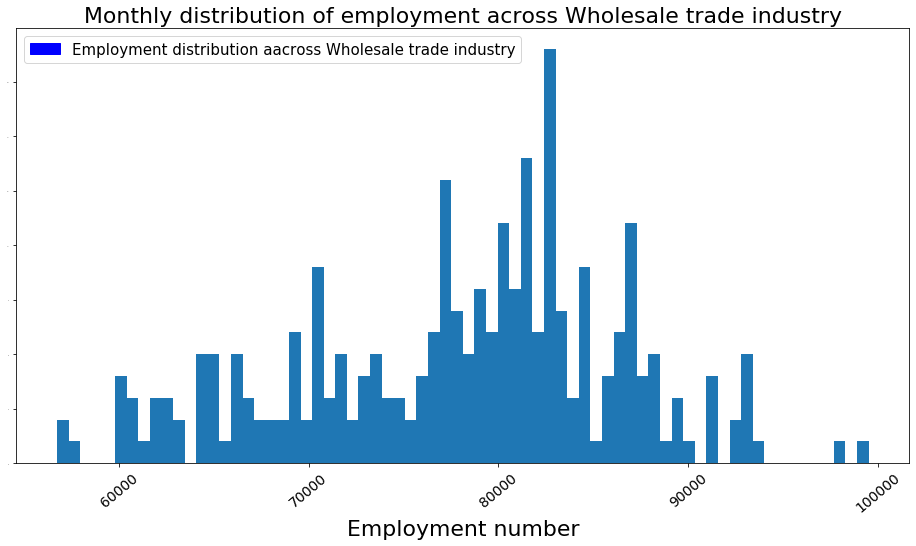

In [37]:
plt.figure(figsize=(16,8))
plt.hist(Wholesale_trade['Employment'], bins =70)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across Wholesale trade industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross Wholesale trade industry')
plt.legend(handles=[blue], prop = {'size':15})

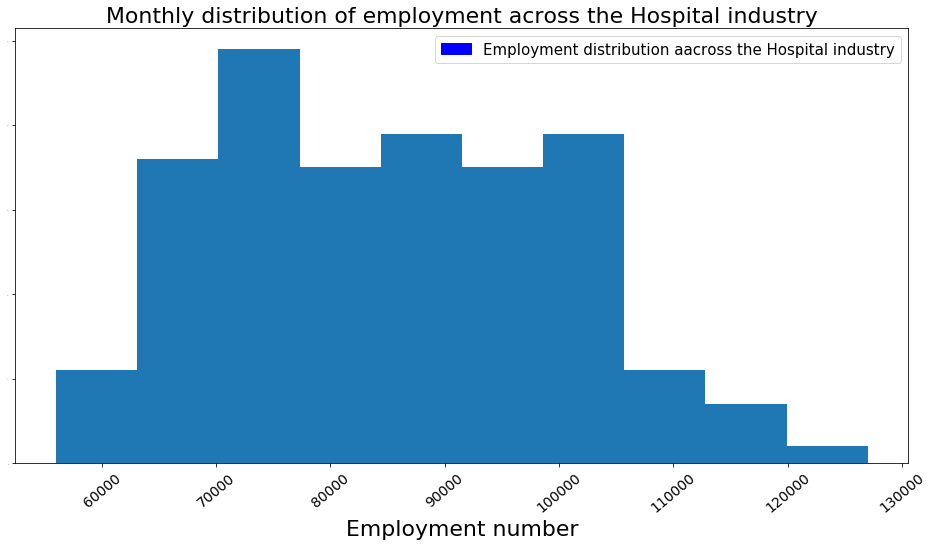

In [38]:
plt.figure(figsize=(16,8))
plt.hist(Hospitals['Employment'], bins =10)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across the Hospital industry', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution aacross the Hospital industry')
plt.legend(handles=[blue], prop = {'size':15})

In [39]:
data_output_mixed = pd.concat([Transportation_equipment_manufacturing_excluding_shipbuilding, 
                               Broadcasting_data_processing_and_information,Farms])


data_output_single = pd.concat([Wholesale_trade, Publishing_industries, Mining_and_quarrying, Hospitals])

data_output = pd.concat([data_output_mixed, data_output_single])
data_output = data_output.sort_values(['SYEAR', 'SMTH', 'LMO_Detailed_Industry'])
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
240,1997,1,Broadcasting data processing and information,9750
0,1997,1,Farms,22250
29945,1997,1,Hospitals[622],62000
29954,1997,1,Mining and quarrying (except oil and gas)[212],11250
29982,1997,1,Publishing industries[511],7250
...,...,...,...,...
28632,2018,12,Hospitals[622],108250
28640,2018,12,Mining and quarrying (except oil and gas)[212],10750
28667,2018,12,Publishing industries[511],16000
227,2018,12,Transportation equipment manufacturing - exclu...,8500


## Visualizations

In [40]:
Mining_and_quarrying
Hospitals
Publishing_industries
Wholesale_trade

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
19,2000,1,Wholesale trade [41],69500
39,2000,2,Wholesale trade [41],70750
59,2000,3,Wholesale trade [41],70500
79,2000,4,Wholesale trade [41],66750
99,2000,5,Wholesale trade [41],65000
...,...,...,...,...
5391,1999,8,Wholesale trade [41],81250
5411,1999,9,Wholesale trade [41],86500
5431,1999,10,Wholesale trade [41],84500
5451,1999,11,Wholesale trade [41],82750


In [41]:
## Plot of all Industruies

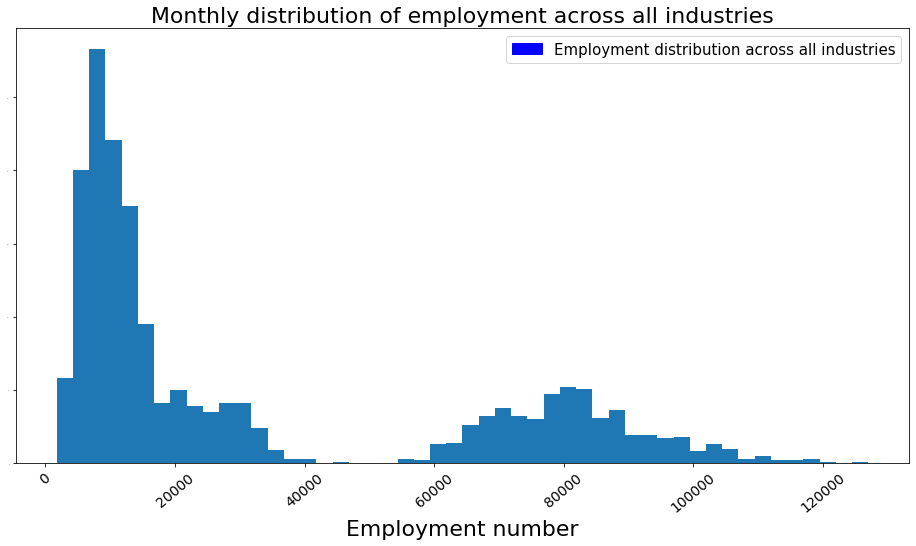

In [42]:
plt.figure(figsize=(16,8))
plt.hist(data_output['Employment'], bins =50)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of employment across all industries', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution across all industries')
plt.legend(handles=[blue], prop = {'size':15})

In [43]:
Mining_and_quarrying
Hospitals
Publishing_industries
Wholesale_trade
Transportation_equipment_manufacturing_excluding_shipbuilding
Broadcasting_data_processing_and_information

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,2000,1,Broadcasting data processing and information,7750
1,2000,2,Broadcasting data processing and information,8750
2,2000,3,Broadcasting data processing and information,9000
3,2000,4,Broadcasting data processing and information,8500
4,2000,5,Broadcasting data processing and information,7000
...,...,...,...,...
271,1999,8,Broadcasting data processing and information,10500
272,1999,9,Broadcasting data processing and information,8750
273,1999,10,Broadcasting data processing and information,9250
274,1999,11,Broadcasting data processing and information,10750


In [44]:
sample_1 = Broadcasting_data_processing_and_information.sample(n = 60)

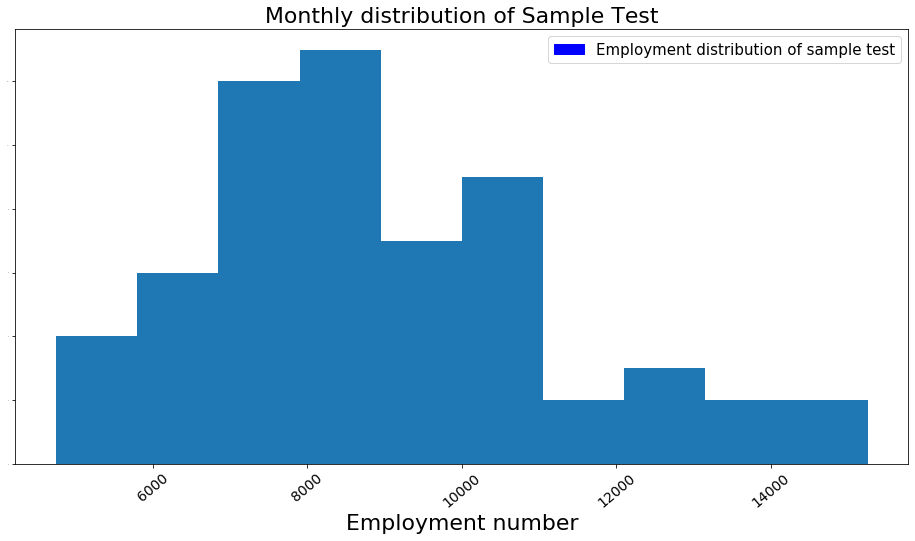

In [45]:
plt.figure(figsize=(16,8))
plt.hist(sample_1['Employment'], bins =10)
#plt.plot(years[0], retail_series['Employment'], color = 'b',marker='o', linewidth=1)

plt.xlabel('Employment number', fontsize=22)
plt.xticks(rotation=40, fontsize = 14)
#plt.ylabel('Other manufacturing  VS  Other retail', fontsize=22)
plt.yticks(fontsize = 0.1)
plt.title('Monthly distribution of Sample Test', fontsize=22)
#red = patches.Patch(color='blue', label='Other manufacturing')
blue = patches.Patch(color='blue', label='Employment distribution of sample test')
plt.legend(handles=[blue], prop = {'size':15})

## ECDF illustrations

In [46]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [47]:
# Compute ECDF for dataframe: x_component, y_component
x_component, y_component = ecdf('data_output')

# Generate plot
_ = plt.plot(x_component, y_component, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Employment number')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

AxisError: axis -1 is out of bounds for array of dimension 0

In [ ]:
# Plot the ECDF
_ = plt.plot(x_component, y_component, '.')
_ = plt.xlabel('Employment number')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()